# Hvordan væske påvirker egenfrekvensen til glass
Nikolai Kemi Engstad

## Introduksjon 
Dette computational essayet tar for seg hvordan væske påvirker egenfrekvensen til glass samt hvordan viskositeten til væsken påvirker egenfrekvensen. Sammenligningen skjer ved å analysere lyden glasset lager med ulik mengde væske og ulike væsker. Dette er interessant for å se hvordan vibrasjon blir påvirket når masse blir lagt til. Eksempler på dette er jordskjelv. Man kan få en bedre forståelse for hvordan jordskjelv oppfører seg på land i forhold til under vann. Man kan også få et nytt syn på musikkinstrumentdesign hvor man kan bruke væske til å oppnå frekvensene man ønsker. 

## Teori
Egenfrekvens er den spesifikke frekvensen et objekt oscillerer med høyest amplitude når det utsettes for en ekstern kraft. Egenfrekvens kommer ann på massen til et objekt og de kreftene som bringer systemet tilbake til likevektstillingen. Egenfrekvensen kan observeres ved å anvende en kraft på et objekt, som et glass, og måle vibrasjonene med lydopptak. Kan så analysere disse opptakene med en Fourier-transformasjon (FFT). (Ormestad, Helmut; Hofstad, Knut, 2023)

For å undersøke dette nærmere, bruker vi FFT for å analysere vibrasjonene i glasset med og uten væske og plotter dette i frekvensdomene. Bruker FFT for å få frekvensresponsen til glasset. Kan dermed plotte amplitude mot frekvens, hvor man lett kan se ved hvilke frekvenser amplituden er høyest. Kan også plotte et spectrogram som viser oss amplitude mot både tid og frekvens. Noe som gjør at man lettere kan se om det er konstant bakgrunnsstøy og filtrere vekk denne. Under testingen er det viktig å redusere bakgrunnsstøy og etterklang. Man kan plassere glasset på en myk overflate og bruke et mykt objekt som den eksterne kraften. Bruker også det samme glasset gjennom alle eksperimentene for å minimere antall variabler og for å være konsistent gjennom eksperimentet.   

 Når vi tilsetter væske i et glass, forventes det at glassets egenfrekvens reduseres. Dette skyldes at glasset vil få en høyere masse og væsken vil virke som en hjelpende kraft til å få glasset til å komme til likevektsstilling. Noe av kraften som får glasset til å vibrere vil bli overført til energi i væsken som gjør at glasset ikke går like høy frekvens.
Man trenger derfor en høyere kraft til å få glasset til å vibrere på en like høye frekvens. Viskositeten til væsken spiller også en rolle; en væske med høy viskositet, som olivenolje (ca. $80mPa\cdot s$ ved $25 \degree$ C) vil gi en større demping enn vann med lav viskositet (ca. $1mPa\cdot s$ ved $25 \degree$ C). Dette skyldes at en væske med høyere viskositet er vanskeligere å sette i bevegelse enn en væske med lavere viskositet. Man vil derfor trenge en høyere kraft for å få en like høy frekvens. (Helseth, Lars Egil, 2023)

## Metode
Setter først et tomt glass på en musematte. Gjør så klart telefonen slik at mikrofonen er litt over glasset som vist i bildet under. Slår så glasset med håndtaket til skrutrekkeren. Tar opp lyden med telefonen og overfører lydfilen til laptopen hvor jeg tar en FFT med numpy sin innebygde funksjon og plotter dataen i både tidsdomene og frekvensdomene samt et spectrogram. Brukte et litermål for å være sikker på at det var en lik mengde med væske for testene. Brukte lunket vann og romtemperert olivenolje. Gjorde målingene flere ganger for å se om resultatene var de samme. 

I dataen så jeg spesifikt etter ved hvilke frekvenser den høyeste amplituden var på. Siden frekvensen glasset oscillerer høyest ved er egenfrekvensen. Printet også forholdet mellom egenfrekvensen til det tomme glasset og egenfrekvensen til de ulike mengdene med væske. Ser også på hvor mye viskositeten påvirker glasset når glasset er halvfullt og fullt. 

<img src="System.jpg" width="500">



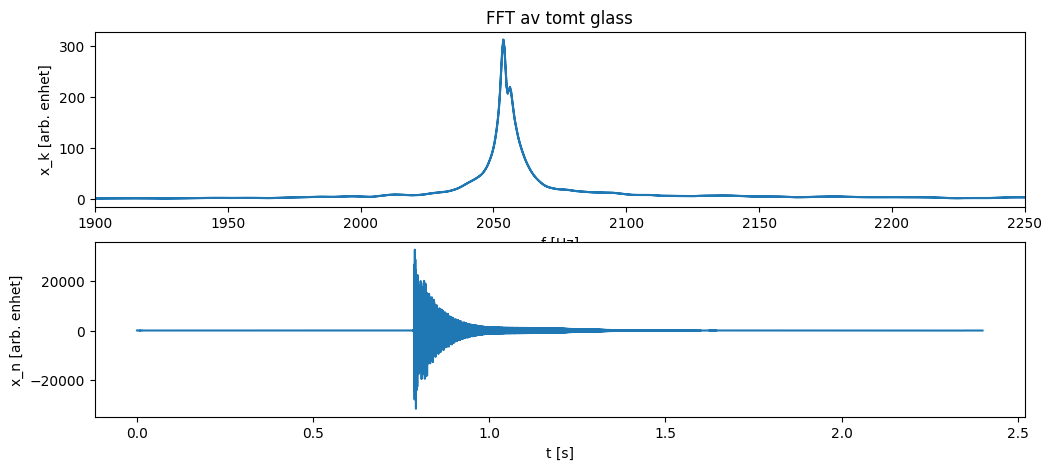

44100


In [3]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal


samplerate, data = wavfile.read("TomVann.wav") 
f_samp1 = samplerate 
x_n1 = data
t1 = np.linspace(0, len(x_n1) / f_samp1, len(x_n1))

tomglass_fft = np.fft.fft(x_n1) / len(x_n1) #FFT av tomt glass
freq_correct = np.fft.fftfreq(len(x_n1), 1/f_samp1) #Frekvenser tilsvarende FFT

fig, ax = plt.subplots(2,1, figsize = (12, 5))
p1 = ax[0].plot(np.abs(freq_correct), np.abs(tomglass_fft))
ax[0].set_xlabel("f [Hz]")
ax[0].set_ylabel('x_k [arb. enhet]')
ax[0].set_xlim(1900, 2250) #Zoomer inn på frekvenser mellom 1900 og 2250 Hz
ax[0].set_title('FFT av tomt glass')
p2 = ax[1].plot(t1, x_n1)
ax[1].set_xlabel('t [s]')
ax[1].set_ylabel('x_n [arb. enhet]') 
plt.show()
print(f_samp1)

def punkter_vindu(f_samp, vindu_størrelse): #Funksjon for å finne antall punkter i vinduet
    return int(vindu_størrelse * f_samp)

vindu_størrelse = 0.03
f1 , t1 , Z1 = signal.stft(x_n1 , f_samp1 , nperseg = punkter_vindu(f_samp1 ,vindu_størrelse)) #STFT av tomt glass



In [4]:
samplerate, data = wavfile.read("HalvFullVann.wav") 
f_samp2 = samplerate
x_n2 = data
t2 = np.linspace(0, len(x_n2) / f_samp2, len(x_n2))

halvfullvann_fft = np.fft.fft(x_n2) / len(x_n2)
freq_correct1 = np.fft.fftfreq(len(x_n2), 1/f_samp2)

vindu_størrelse = 0.03
f2 , t2 , Z2 = signal.stft(x_n2 , f_samp2 , nperseg = punkter_vindu(f_samp2 ,vindu_størrelse))


In [5]:
samplerate, data = wavfile.read("FullVann.wav") 
f_samp3 = samplerate
x_n3 = data
t3 = np.linspace(0, len(x_n3) / f_samp3, len(x_n3))

fullvann_fft = np.fft.fft(x_n3) / len(x_n3)
freq_correct2 = np.fft.fftfreq(len(x_n3), 1/f_samp3)


vindu_størrelse = 0.03
f3 , t3 , Z3 = signal.stft(x_n3 , f_samp3 , nperseg = punkter_vindu(f_samp3 ,vindu_størrelse))


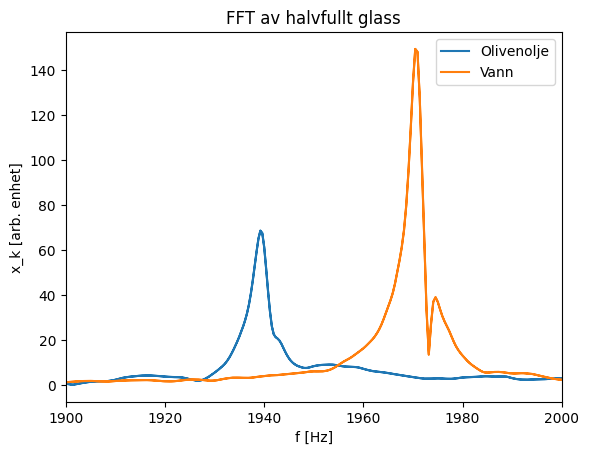

44100


In [17]:
samplerate, data = wavfile.read("HalvFullOlje.wav") 
f_samp4 = samplerate
x_n4 = data
t4 = np.linspace(0, len(x_n4) / f_samp4, len(x_n4))

halvfullolje_fft = np.fft.fft(x_n4) / len(x_n4)
freq_correct3 = np.fft.fftfreq(len(x_n4), 1/f_samp4)


plt.plot(np.abs(freq_correct3), np.abs(halvfullolje_fft), label = "Olivenolje")
plt.plot(np.abs(freq_correct1), np.abs(halvfullvann_fft), label = "Vann")
plt.xlabel("f [Hz]")
plt.ylabel('x_k [arb. enhet]')
plt.xlim(1900, 2000)
plt.title('FFT av halvfullt glass')
plt.legend()
plt.show()

print(f_samp4)

vindu_størrelse = 0.03
f4 , t4 , Z4 = signal.stft(x_n4 , f_samp4 , nperseg = punkter_vindu(f_samp4 ,vindu_størrelse))





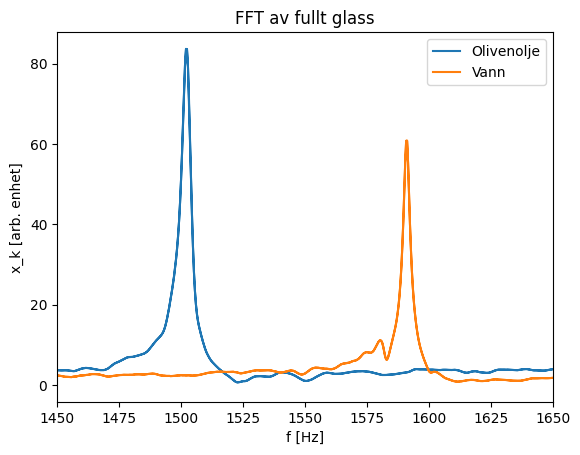

44100


In [22]:
samplerate, data = wavfile.read("FullOlje.wav") 
f_samp = samplerate
x_n5 = data
t5 = np.linspace(0, len(x_n5) / f_samp, len(x_n5))

fullolje_fft = np.fft.fft(x_n5) / len(x_n5)
freq_correct4 = np.fft.fftfreq(len(x_n5), 1/f_samp)


plt.plot(np.abs(freq_correct4), np.abs(fullolje_fft), label = "Olivenolje")
plt.plot(np.abs(freq_correct2), np.abs(fullvann_fft), label = "Vann")
plt.xlabel("f [Hz]")
plt.ylabel('x_k [arb. enhet]')
plt.xlim(1450, 1650)
plt.title('FFT av fullt glass')
plt.legend()
plt.show()

print(f_samp)

vindu_størrelse = 0.03
f5 , t5 , Z5 = signal.stft(x_n5 , f_samp , nperseg = punkter_vindu(f_samp ,vindu_størrelse))


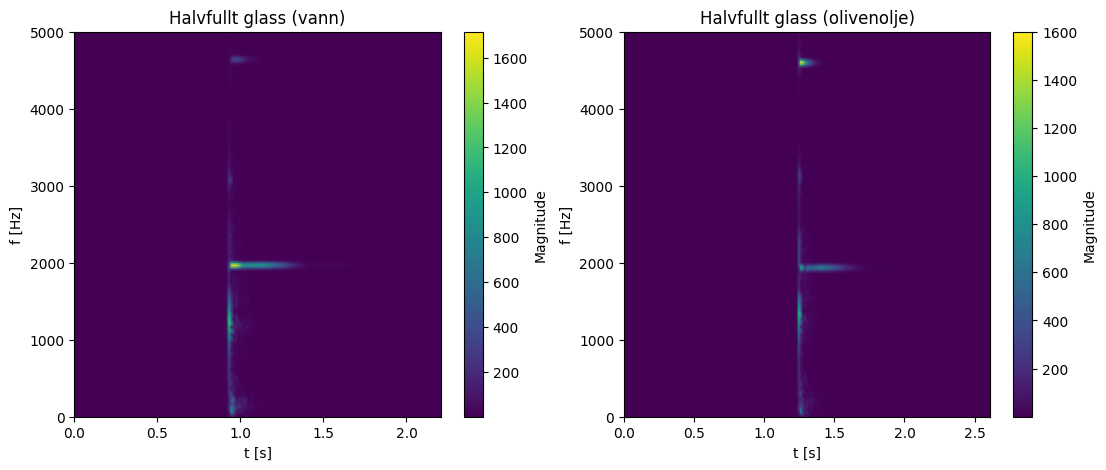

In [8]:
fig, ax = plt.subplots(1,2, figsize = (13, 5))
p1 = ax[0].pcolormesh(t2, f2, np.abs(Z2), shading =  "gouraud")
p2 = ax[1].pcolormesh(t4, f4, np.abs(Z4), shading =  "gouraud") 

ax[0].set_xlabel('t [s]')
ax[0].set_ylabel("f [Hz]")
ax[0].set_ylim(0, 5000) #Zoomer inn på frekvenser mellom 0 og 5000 Hz
ax[1].set_ylim(0, 5000) #Zoomer inn på frekvenser mellom 0 og 5000 Hz
ax[0].set_title('Halvfullt glass (vann)')
ax[1].set_title('Halvfullt glass (olivenolje)')
ax[1].set_xlabel('t [s]')
ax[1].set_ylabel('f [Hz]')
fig.colorbar(p1, ax=ax[0], orientation='vertical', label = 'Magnitude')
fig.colorbar(p2, ax=ax[1], orientation='vertical', label = 'Magnitude')

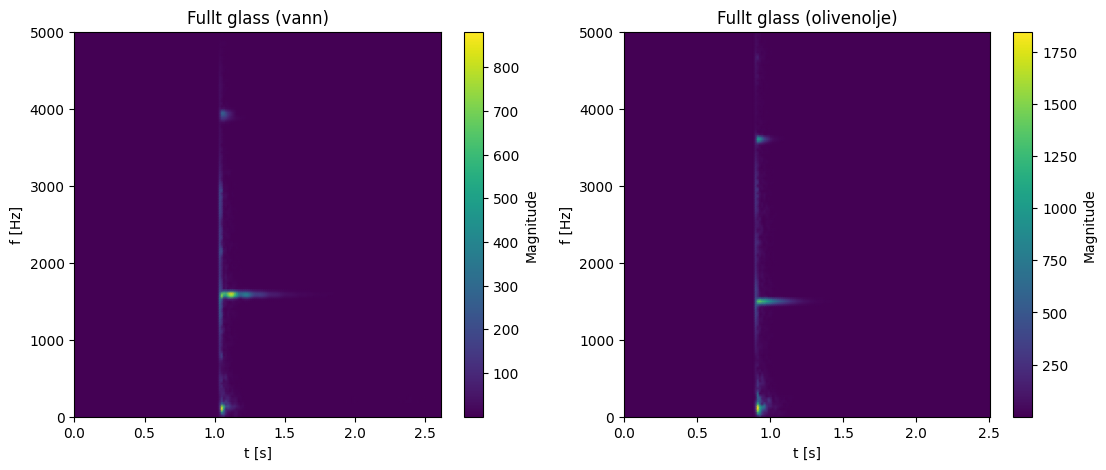

In [23]:
fig, ax = plt.subplots(1,2, figsize = (13, 5))
p1 = ax[0].pcolormesh(t3, f3, np.abs(Z3), shading =  "gouraud")
p2 = ax[1].pcolormesh(t5, f5, np.abs(Z5), shading =  "gouraud") 

ax[0].set_ylabel("f [Hz]")
ax[0].set_xlabel('t [s]')
ax[0].set_ylim(0, 5000)
ax[1].set_ylim(0, 5000)
ax[0].set_title('Fullt glass (vann)')
ax[1].set_title('Fullt glass (olivenolje)')
ax[1].set_xlabel('t [s]')
ax[1].set_ylabel('f [Hz]')
fig.colorbar(p1, ax=ax[0], orientation='vertical', label = 'Magnitude')
fig.colorbar(p2, ax=ax[1], orientation='vertical', label = 'Magnitude')

In [35]:
forhold_ho = 2050-1939 #  Endring i frekvensen til halvfullt glass olje
forhold_hv = 2050-1970 # Endring i frekvensen til fullt glass vann
forhold_fo = 2050-1500 # Endring i frekvensen til fullt glass olje
forhold_fv = 2050-1590  # Endring i frekvensen til fullt glass vann

effekt_h = forhold_ho / forhold_hv # Effekten av viskostet i halvfullt glass
effekt_f = forhold_fo / forhold_fv # Effekten av viskositet i fullt glass

effekt_visk = effekt_h - effekt_f # Forskjellen mellom effekten av viskositet i fullt glass og halvfullt glass

print(forhold_ho, "Hz")
print(forhold_hv, "Hz")
print(forhold_fo, "Hz")
print(forhold_fv, "Hz")
print(effekt_h) 
print(effekt_f) 
print(effekt_visk) 

111 Hz
80 Hz
550 Hz
460 Hz
1.3875
1.1956521739130435
0.1918478260869565


## Resultat
Ser at det er en forskjell mellom når glasset blir fylt med væske. Ser også at viskositeten til væsken påvirker frekvensen som forventet. Olivenoljen skaper en lavere frekvens enn vannet. Det som påvirket egenfrekvensen mest var om den var fylt opp helt. Når glasset var fylt ble egenfrekvensen påvirket betydelig både for vann og olivenolje. Dette kan skyldes at glasset ble påført kraft i toppen og dermed er det i toppen av glasset som genererer mest av lyden. Det er også en forskjell i amplitude, men dette skyldes hvor nær mikrofonenen er. 

Ser også at viskositeten påvirker egenfrekvensen i større grad når glasset er fullt enn når glasset er halvfullt. Dette skyldes at mer av glasset er fyllt med en tykkere substans enn når den er halvfull. Selvom mengden væske dobles så tredobbles effekten av viskositeten. 

## Konklusjon 
Det er klart at væske påvirker egenfrekvensen. Det som påvirket egenfrekvesen mest var om glasset var fylt opp helt. Ser også at viskositeten til væsken påvirket egenfrekvensen, men i en mindre grad. Selvom olivenolje har en viskositet som er 80 ganger større enn vann så var effekten av olivenoljen 39% mer når glasset var halvfullt og 19% mer når glasset var fullt. Noe som var uforventet, jeg forventet at den høyere viskositeten ville ha mer å si når glasset var fullt siden når en større del av massen er vanskeligere å bevege, vil dempningen være høyere.

Kan videre undersøke hvor endringen i egenfrekvensen er størst i forhold til mengde væske i glasset siden det er en så stor forskjell i egenfrekvens når glasset er fullt og halvfullt. Kan også se på flere væsker med forskjellig viskositet for å se hva forholdet mellom viskositet og egenfrekvens er. Man kan så ta en regresjonsanalyse for å visualisere forholdet mellom viskositet og egenfrekvens. 

Metoden som ble brukt var ganske simpel. Det er vanskelig å ha lik kraft hver gang man slår glasset så man burde bruke noe som tilfører en konstant kraft. For eksempel en pendel som blir sluppet fra en bestemt vinkel. Brukte også mikrofonen på telefonen for å ta opptakene som ikke er den beste mikrofonen. Noe som kan føre til mer støy og ujevn representasjon av amplituder. 

Utifra testene fikk jeg en bedre forståelse for hvordan væske med forskjellige viskositeter kan brukes til å endre egenfrekvensen til objekter. Fikk også en bredere forståelse for hvordan lette eksperimenter kan gi oss en ide om hvordan ting fungerer i en større skala. 

## Refereranser
Ormestad, Helmut; Hofstad, Knut: egenfrekvens i Store norske leksikon på snl.no. Hentet 11. april 2024 fra https://snl.no/egenfrekvens

Helseth, Lars Egil: viskositet i Store norske leksikon på snl.no. Hentet 11. april 2024 fra https://snl.no/viskositet